In [265]:
import os
import requests
import pandas as pd
import datetime as dt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import panel as pn
%matplotlib inline

In [4]:
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

True

In [178]:
 pn.extension()

In [5]:
def get_workday(date):
    date = pd.to_datetime(date)
    offset = max(1, (date.weekday() + 6) % 7 - 3)
    timedelta = dt.timedelta(offset)
    return pd.Timestamp((date - timedelta).date(),tz="America/New_York").isoformat()

In [6]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [7]:
# Format current date as ISO format
end_date = get_workday("today")
two_yrs = dt.timedelta(days=(365*2))
start_date = get_workday((pd.to_datetime("today") - two_yrs).date())
# Set the tickers
tickers = ["AAPL", "MSFT", "AMZN", "FB", "GOOGL", "BRK.B", "JNJ", "V", "PG"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio.head()

AAPL                                       AMZN  \
                             open    high     low   close    volume     open   
time                                                                           
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876  1678.59   
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747  1657.57   
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956  1618.35   
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827  1673.00   
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333  1752.89   

                                                                ...     PG  \
                              high       low    close   volume  ...   open   
time                                                            ...          
2018-11-02 00:00:00-04:00  1697.44  1651.830  1665.58  6221611  ...  89.88   
2018-11-05 00:00:00-05:00  1658.09  1596.360  1627.45  5231856  ...  89.89   
2018-11-06 00:00:00-05:00  1665.00  1614.550  1642.86  4000487  ...  90.86   
2018-11-07 00:00:00-05:00  1759.23  1664.075  1757.36  7606948  ...  91.59   
2018-11-08 00:00:00-05:00  1784.00  1725.110  1754.95  3299391  ...  90.95   

                                                                  V            \
                             high      low  close    volume    open      high   
time                                                                            
2018-11-02 00:00:00-04:00  89.950  88.9802  89.78   7948357  141.11  141.4546   
2018-11-05 00:00:00-05:00  91.440  89.8150  91.20  10188682  139.80  140.2100   
2018-11-06 00:00:00-05:00  91.530  90.4300  91.50   6725480  139.80  140.9100   
2018-11-07 00:00:00-05:00  91.620  90.6200  91.27   7100305  142.34  144.9000   
2018-11-08 00:00:00-05:00  91.525  90.6700  91.38   4965339  144.60  145.4600   

                                                     
                               low   close   volume  
time                                                 
2018-11-02 00:00:00-04:00  137.850  139.70  7017962  
2018-11-05 00:00:00-05:00  138.070  139.79  5472273  
2018-11-06 00:00:00-05:00  139.720  140.78  4203592  
2018-11-07 00:00:00-05:00  142.320  144.79  8532136  
2018-11-08 00:00:00-05:00  143.652  145.24  4277204  

[5 rows x 45 columns]

In [8]:
AAPL_ticker = "AAPL"

In [9]:


df_portfolio_AAPL = api.get_barset(
    AAPL_ticker,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio_AAPL.head()

AAPL                                  
                             open    high     low   close    volume
time                                                               
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333

# Monte Carlo Simulation - 2 weeks

In [10]:
MC_2wks = MCSimulation(
    portfolio_data = df_portfolio,
    num_simulation = 500,
    num_trading_days = 10
)

MC_2wks.portfolio_data.head()


AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876   
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747   
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956   
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827   
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333   

                                           AMZN                              \
                          daily_return     open     high       low    close   
time                                                                          
2018-11-02 00:00:00-04:00          NaN  1678.59  1697.44  1651.830  1665.58   
2018-11-05 00:00:00-05:00    -0.022072  1657.57  1658.09  1596.360  1627.45   
2018-11-06 00:00:00-05:00     0.010864  1618.35  1665.00  1614.550  1642.86   
2018-11-07 00:00:00-05:00     0.030081  1673.00  1759.23  1664.075  1757.36   
2018-11-08 00:00:00-05:00    -0.006765  1752.89  1784.00  1725.110  1754.95   

                           ...       PG                                     V  \
                           ...      low  close    volume daily_return    open   
time                       ...                                                  
2018-11-02 00:00:00-04:00  ...  88.9802  89.78   7948357          NaN  141.11   
2018-11-05 00:00:00-05:00  ...  89.8150  91.20  10188682     0.015816  139.80   
2018-11-06 00:00:00-05:00  ...  90.4300  91.50   6725480     0.003289  139.80   
2018-11-07 00:00:00-05:00  ...  90.6200  91.27   7100305    -0.002514  142.34   
2018-11-08 00:00:00-05:00  ...  90.6700  91.38   4965339     0.001205  144.60   

                                                                            
                               high      low   close   volume daily_return  
time                                                                        
2018-11-02 00:00:00-04:00  141.4546  137.850  139.70  7017962          NaN  
2018-11-05 00:00:00-05:00  140.2100  138.070  139.79  5472273     0.000644  
2018-11-06 00:00:00-05:00  140.9100  139.720  140.78  4203592     0.007082  
2018-11-07 00:00:00-05:00  144.9000  142.320  144.79  8532136     0.028484  
2018-11-08 00:00:00-05:00  145.4600  143.652  145.24  4277204     0.003108  

[5 rows x 54 columns]

In [11]:
MC_2wks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.005838  1.004326  0.991744  1.014794  1.001014  0.998829  1.009485   
2   1.003506  1.002906  0.987295  0.998339  1.001297  0.987262  0.999804   
3   1.012322  0.997654  0.995690  1.004263  1.009430  0.986014  0.987791   
4   1.005994  0.997251  0.992639  0.993754  1.003781  0.988301  0.983671   
5   1.009450  1.008120  1.002245  0.996698  1.004330  0.992753  0.981162   
6   1.009606  1.009007  1.005598  1.001255  1.000462  0.976362  0.983532   
7   1.004342  1.012277  1.005625  0.998783  0.992896  0.957202  0.985109   
8   1.009050  0.998884  1.012883  1.002134  0.989753  0.945518  0.994598   
9   1.012429  1.004228  1.013863  1.006092  0.986690  0.951219  0.983191   
10  1.006301  1.003018  1.007928  1.013992  0.993088  0.938608  0.981236   

         7         8         9    ...       490       491       492       493  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.000017  1.003133  0.994613  ...  0.991164  1.001175  0.996830  1.005577   
2   0.996321  1.006551  0.999758  ...  0.994575  1.003392  0.990033  1.015535   
3   0.998901  1.006102  0.985578  ...  0.992568  1.016181  0.998200  1.021327   
4   1.013365  1.023140  1.002522  ...  0.987854  1.020110  0.990618  1.034714   
5   1.020160  1.024719  0.994646  ...  0.989584  1.024897  1.004979  1.034796   
6   1.028467  1.016659  1.001367  ...  0.989465  1.025171  1.006163  1.043837   
7   1.026250  1.011809  1.004563  ...  0.983949  1.027901  1.013906  1.042266   
8   1.032519  1.009588  1.005227  ...  0.988672  1.022071  1.017758  1.029630   
9   1.030770  1.034756  1.005010  ...  0.984384  1.036286  1.005764  1.026146   
10  1.032226  1.039375  0.997391  ...  0.984296  1.045455  1.008819  1.027317   

         494       495       496       497       498       499  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   0.991309  1.003001  1.000414  1.001036  1.014429  0.995964  
2   0.995699  0.999417  1.014633  0.995758  1.009086  1.007619  
3   0.992977  0.996515  1.001244  0.995374  1.027290  1.006444  
4   1.004724  0.988883  0.992155  1.003202  1.029454  1.013028  
5   0.997924  0.976123  1.000041  1.003422  1.031325  1.010757  
6   0.986361  0.970749  0.999257  1.014890  1.029191  1.022338  
7   0.983632  0.970988  1.017277  1.023709  1.029020  1.016307  
8   0.993168  0.972994  1.030060  1.019441  1.023186  1.027924  
9   1.012379  0.983950  1.025817  1.004698  1.024302  1.024837  
10  1.002635  0.984368  1.014488  1.007612  1.020513  1.026699  

[11 rows x 500 columns]

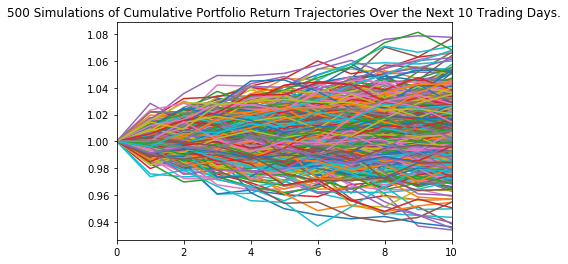

In [179]:
wk_line_plot = MC_2wks.plot_simulation()

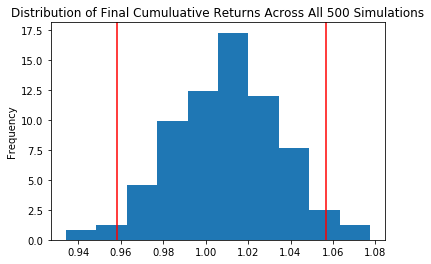

In [180]:
wk_dist_plot = MC_2wks.plot_distribution()

In [16]:
MC_tbl = MC_2wks.summarize_cumulative_return()
print(MC_tbl)

count           500.000000
mean              1.009260
std               0.025337
min               0.934028
25%               0.992797
50%               1.010883
75%               1.026118
max               1.077562
95% CI Lower      0.958006
95% CI Upper      1.056578
Name: 10, dtype: float64


# Monte Carlo Simulation - 1 month

In [17]:
MC_1mo = MCSimulation(
    portfolio_data = df_portfolio,
    num_simulation = 500,
    num_trading_days = 20
)

MC_1mo.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876   
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747   
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956   
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827   
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333   

                                           AMZN                              \
                          daily_return     open     high       low    close   
time                                                                          
2018-11-02 00:00:00-04:00          NaN  1678.59  1697.44  1651.830  1665.58   
2018-11-05 00:00:00-05:00    -0.022072  1657.57  1658.09  1596.360  1627.45   
2018-11-06 00:00:00-05:00     0.010864  1618.35  1665.00  1614.550  1642.86   
2018-11-07 00:00:00-05:00     0.030081  1673.00  1759.23  1664.075  1757.36   
2018-11-08 00:00:00-05:00    -0.006765  1752.89  1784.00  1725.110  1754.95   

                           ...       PG                                     V  \
                           ...      low  close    volume daily_return    open   
time                       ...                                                  
2018-11-02 00:00:00-04:00  ...  88.9802  89.78   7948357          NaN  141.11   
2018-11-05 00:00:00-05:00  ...  89.8150  91.20  10188682     0.015816  139.80   
2018-11-06 00:00:00-05:00  ...  90.4300  91.50   6725480     0.003289  139.80   
2018-11-07 00:00:00-05:00  ...  90.6200  91.27   7100305    -0.002514  142.34   
2018-11-08 00:00:00-05:00  ...  90.6700  91.38   4965339     0.001205  144.60   

                                                                            
                               high      low   close   volume daily_return  
time                                                                        
2018-11-02 00:00:00-04:00  141.4546  137.850  139.70  7017962          NaN  
2018-11-05 00:00:00-05:00  140.2100  138.070  139.79  5472273     0.000644  
2018-11-06 00:00:00-05:00  140.9100  139.720  140.78  4203592     0.007082  
2018-11-07 00:00:00-05:00  144.9000  142.320  144.79  8532136     0.028484  
2018-11-08 00:00:00-05:00  145.4600  143.652  145.24  4277204     0.003108  

[5 rows x 54 columns]

In [18]:
MC_1mo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.002712  0.988869  1.003107  0.994818  1.023140  0.982994  0.995411   
2   1.005838  0.991623  1.000009  0.987875  1.030542  0.996027  1.005902   
3   1.024601  0.996203  1.005137  0.983831  1.031329  0.983046  0.987174   
4   1.019992  0.983401  1.010506  0.982449  1.036523  0.990952  0.994915   
5   1.024961  0.982426  0.999246  0.972455  1.028917  1.002769  0.991390   
6   1.019458  0.992452  1.005616  0.965613  1.038891  1.006842  0.990062   
7   1.019225  0.984286  0.997587  0.966788  1.051993  1.015787  0.978522   
8   1.017633  0.997612  1.004214  0.961766  1.049676  1.026125  0.970649   
9   1.009169  0.996993  1.005507  0.967985  1.053615  1.028155  0.963214   
10  0.979919  1.002412  1.003356  0.959340  1.051279  1.039580  0.960037   
11  0.990122  0.996422  1.009597  0.944757  1.042873  1.051294  0.949798   
12  0.995216  1.000465  1.006977  0.958692  1.033807  1.039472  0.960289   
13  0.994270  1.011060  1.001580  0.956736  1.026978  1.027035  0.969902   
14  0.997002  1.026246  0.997858  0.959419  1.033542  1.021792  0.984429   
15  1.006839  1.027747  0.996353  0.942133  1.028926  1.027436  0.991162   
16  1.010176  1.031437  1.016701  0.943201  1.025415  1.034033  0.980816   
17  1.017466  1.036940  1.028982  0.939968  1.032817  1.042055  0.980285   
18  1.019914  1.035522  1.013091  0.929709  1.040430  1.048335  0.973584   
19  1.025725  1.032911  1.014030  0.924904  1.047080  1.065138  0.982181   
20  1.014999  1.029613  1.003909  0.915368  1.063272  1.075922  0.985386   

         7         8         9    ...       490       491       492       493  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.001573  0.994140  0.998617  ...  0.990902  0.994439  1.001220  1.009315   
2   1.004604  1.002437  0.998542  ...  0.998447  0.996097  1.002484  1.011826   
3   1.005974  1.000859  1.001721  ...  0.997810  0.999280  1.011756  1.006194   
4   1.000223  1.001520  1.000908  ...  0.986340  0.990259  1.000027  1.007468   
5   1.005082  0.995158  0.999887  ...  0.992277  1.001760  0.998894  1.006261   
6   1.016654  0.997153  0.983774  ...  0.999034  1.001269  1.005176  1.006950   
7   1.023340  1.004838  1.001207  ...  1.001664  0.993918  1.007263  1.007071   
8   1.036122  1.006181  1.012892  ...  0.991341  0.993809  1.004498  1.016758   
9   1.045587  1.005834  1.012110  ...  0.994155  0.992150  0.987028  0.998333   
10  1.028881  1.004621  1.011440  ...  0.996220  0.992163  0.983833  0.997927   
11  1.033478  0.994387  1.010336  ...  0.984977  0.996584  0.976933  1.001420   
12  1.036254  1.006443  1.014966  ...  0.978272  1.002710  0.981104  1.000166   
13  1.031315  1.007107  1.015248  ...  0.977283  1.008172  0.969678  0.992907   
14  1.037142  1.003543  1.011663  ...  0.985816  1.011271  0.971223  0.997048   
15  1.037410  1.002222  1.022116  ...  0.991101  1.001778  0.970143  0.992292   
16  1.036986  0.985247  1.029523  ...  0.982345  0.992637  0.975951  0.984428   
17  1.034739  0.994635  1.030192  ...  0.985694  0.977132  0.993164  1.000400   
18  1.043127  0.980782  1.038118  ...  0.984599  0.983328  0.981583  0.998503   
19  1.045289  0.976841  1.024631  ...  1.000110  0.987343  0.992637  0.997965   
20  1.052071  0.978283  1.020528  ...  1.005265  0.992605  0.985674  0.990119   

         494       495       496       497       498       499  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   0.993799  1.000776  1.015956  1.001061  1.004292  1.015216  
2   1.003654  1.005121  1.019161  1.009693  1.009347  1.011580  
3   1.019226  0.998040  1.019968  1.010410  1.012758  1.018056  
4   1.040440  0.988975  1.029874  1.022297  1.011954  1.023218  
5   1.043093  0.982958  1.036172  1.030607  1.016590  1.020854  
6   1.049346  1.000119  1.035660  1.041592  1.016347  1.028737  
7   1.047803  1.006621  1.044039 

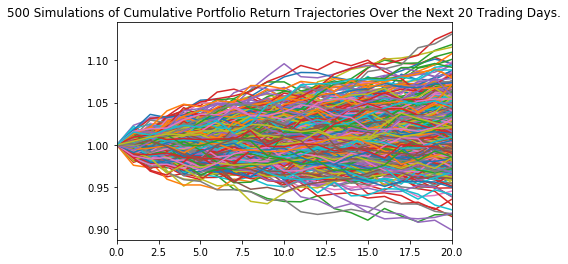

In [183]:
mo_line_plot = MC_1mo.plot_simulation()

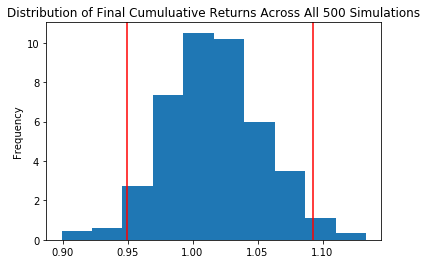

In [184]:
mo_dist_plot = MC_1mo.plot_distribution()

In [21]:
MC_tbl_1mo = MC_1mo.summarize_cumulative_return()
print(MC_tbl_1mo)

count           500.000000
mean              1.016873
std               0.036925
min               0.899288
25%               0.992566
50%               1.015954
75%               1.040486
max               1.133393
95% CI Lower      0.949463
95% CI Upper      1.092964
Name: 20, dtype: float64


# Monte Carlo Simulation - 1 Year

In [22]:
MC_1yr = MCSimulation(
    portfolio_data = df_portfolio,
    num_simulation = 500,
    num_trading_days = 252
)

MC_1yr.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876   
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747   
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956   
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827   
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333   

                                           AMZN                              \
                          daily_return     open     high       low    close   
time                                                                          
2018-11-02 00:00:00-04:00          NaN  1678.59  1697.44  1651.830  1665.58   
2018-11-05 00:00:00-05:00    -0.022072  1657.57  1658.09  1596.360  1627.45   
2018-11-06 00:00:00-05:00     0.010864  1618.35  1665.00  1614.550  1642.86   
2018-11-07 00:00:00-05:00     0.030081  1673.00  1759.23  1664.075  1757.36   
2018-11-08 00:00:00-05:00    -0.006765  1752.89  1784.00  1725.110  1754.95   

                           ...       PG                                     V  \
                           ...      low  close    volume daily_return    open   
time                       ...                                                  
2018-11-02 00:00:00-04:00  ...  88.9802  89.78   7948357          NaN  141.11   
2018-11-05 00:00:00-05:00  ...  89.8150  91.20  10188682     0.015816  139.80   
2018-11-06 00:00:00-05:00  ...  90.4300  91.50   6725480     0.003289  139.80   
2018-11-07 00:00:00-05:00  ...  90.6200  91.27   7100305    -0.002514  142.34   
2018-11-08 00:00:00-05:00  ...  90.6700  91.38   4965339     0.001205  144.60   

                                                                            
                               high      low   close   volume daily_return  
time                                                                        
2018-11-02 00:00:00-04:00  141.4546  137.850  139.70  7017962          NaN  
2018-11-05 00:00:00-05:00  140.2100  138.070  139.79  5472273     0.000644  
2018-11-06 00:00:00-05:00  140.9100  139.720  140.78  4203592     0.007082  
2018-11-07 00:00:00-05:00  144.9000  142.320  144.79  8532136     0.028484  
2018-11-08 00:00:00-05:00  145.4600  143.652  145.24  4277204     0.003108  

[5 rows x 54 columns]

In [23]:
MC_1yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.001749  1.009795  0.995448  0.992202  1.004626  1.006827  0.999606   
2    0.995739  1.016689  1.007883  0.993149  1.004800  1.028961  0.994731   
3    0.996834  1.010692  1.017790  0.997300  0.997089  1.027440  0.996330   
4    0.993021  1.005917  1.017208  1.000973  1.001862  1.023000  1.004322   
5    0.999941  1.017157  1.012991  1.013260  1.007272  1.026012  0.999519   
6    1.007690  1.018192  1.031148  1.020918  1.009475  1.021122  1.000828   
7    0.996065  1.023908  1.043755  1.021638  1.009407  1.025020  1.006491   
8    0.992033  1.011745  1.051101  1.023543  1.012596  1.024340  1.001439   
9    0.989803  1.018692  1.055356  1.035436  1.024566  1.010483  1.006557   
10   1.001597  1.013860  1.052681  1.048855  1.002362  1.003056  1.017652   
11   0.994882  1.016925  1.052629  1.052600  1.004975  0.985428  1.013984   
12   0.984577  1.010899  1.058449  1.036080  1.007230  0.995291  1.003974   
13   0.994378  0.989194  1.053981  1.038956  1.003219  0.998054  1.000053   
14   0.980408  0.991490  1.052066  1.032145  1.012055  1.001670  0.988404   
15   0.994338  0.996871  1.054788  1.043490  1.016836  1.002459  0.982491   
16   0.978926  1.001346  1.052903  1.039586  1.015140  0.998473  0.992883   
17   0.961907  1.005582  1.062919  1.048121  1.008898  0.984271  0.983771   
18   0.972600  1.018193  1.069716  1.055606  1.002126  0.981172  0.972798   
19   0.980851  1.027235  1.077220  1.061847  0.994887  0.976057  0.976956   
20   0.984459  1.025810  1.077333  1.057269  0.996254  0.990380  0.992191   
21   0.984850  1.019145  1.067950  1.049487  1.006158  0.990006  0.999751   
22   0.989367  1.021524  1.057495  1.049779  1.004576  0.991553  1.004619   
23   0.989286  1.021563  1.066257  1.051226  1.012490  0.994241  0.995836   
24   0.984649  1.010468  1.060808  1.062442  1.013552  0.994485  0.979337   
25   0.996094  1.011354  1.061440  1.070250  1.007811  0.991120  0.984680   
26   1.000921  1.019192  1.058775  1.054445  1.023953  0.996550  0.985894   
27   1.008669  1.030053  1.048248  1.054060  1.032676  1.007009  0.979051   
28   1.005415  1.037508  1.049334  1.067615  1.035899  1.003077  0.968170   
29   0.996604  1.033381  1.055347  1.071821  1.039990  1.015918  0.966884   
..        ...       ...       ...       ...       ...       ...       ...   
223  1.291171  0.907590  1.053131  1.199743  1.276332  1.138123  0.998203   
224  1.308494  0.896326  1.039071  1.196696  1.278503  1.138484  0.984535   
225  1.283595  0.903578  1.048944  1.199192  1.282414  1.142781  0.992068   
226  1.273050  0.904825  1.052473  1.191738  1.285164  1.147713  0.991966   
227  1.290847  0.906863  1.060112  1.192058  1.284897  1.137087  0.985867   
228  1.287870  0.925768  1.059877  1.207786  1.304675  1.157401  0.983010   
229  1.291937  0.918581  1.073689  1.211729  1.301495  1.172326  0.984758   
230  1.296641  0.922740  1.066456  1.209885  1.306975  1.179896  0.982907   
231  1.286562  0.916986  1.075240  1.192779  1.279073  1.189153  0.997122   
232  1.315768  0.930075  1.080651  1.196720  1.301735  1.189852  1.007924   
233  1.328818  0.938385  1.080081  1.198060  1.308913  1.189821  1.012446   
234  1.323211  0.941003  1.092326  1.194869  1.318487  1.187734  0.992525   
235  1.314895  0.933134  1.095896  1.195260  1.290392  1.192937  0.994411   
236  1.326207  0.925561  1.086802  1.189103  1.296527  1.213423  0.990311   
237  1.333741  0.922733  1.078882  1.184456  1.301035  1.207222  0.981503   
238  1.321070  0.929503  1.075541  1.181972  1.310720  1.195039  0.977597   
239  1.317605  0.926564  1.062950  1.180198  1.333269  1.177529  0.967654   
240  1.316082  0.939454  1.079354  1.172594  1.337581  1.183717  0.956089   
241  1.326011  0.923492  1.075788  1.176512  1.312644  1.179338  0.963768   
242  1.322098  0.918376  1.089955  1.173292  1.326838  1.186629  0.962186   
243  1

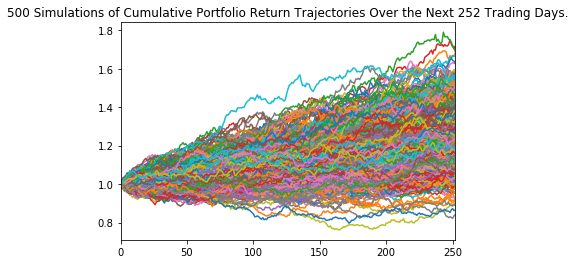

In [185]:
yr_line_plot = MC_1yr.plot_simulation()

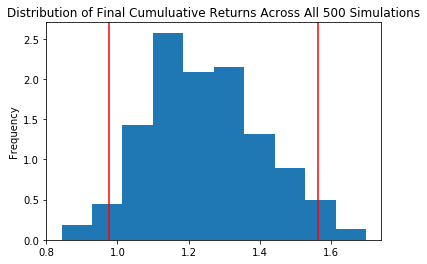

In [186]:
yr_dist_plot = MC_1yr.plot_distribution()

In [26]:
MC_tbl_1yr = MC_1yr.summarize_cumulative_return()
print(MC_tbl_1yr)

count           500.000000
mean              1.245711
std               0.158296
min               0.843386
25%               1.129614
50%               1.235044
75%               1.349654
max               1.697315
95% CI Lower      0.975218
95% CI Upper      1.562076
Name: 252, dtype: float64


# Monte Carlo Simulation for Apple- 2 Weeks

In [27]:
AAPL_2wks = MCSimulation(
    portfolio_data = df_portfolio_AAPL,
    num_simulation = 500,
    num_trading_days = 10
)

AAPL_2wks.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876   
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747   
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956   
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827   
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333   

                                        
                          daily_return  
time                                    
2018-11-02 00:00:00-04:00          NaN  
2018-11-05 00:00:00-05:00    -0.022072  
2018-11-06 00:00:00-05:00     0.010864  
2018-11-07 00:00:00-05:00     0.030081  
2018-11-08 00:00:00-05:00    -0.006765

In [28]:
AAPL_2wks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.051419  1.055103  0.993860  1.010641  0.891399  0.964014  0.970673   
2   0.905903  1.039050  1.055280  1.053097  0.868317  1.023837  0.985133   
3   0.906121  1.031015  1.049681  0.977975  0.834699  0.983487  0.914976   
4   0.947489  1.000777  1.032929  1.030953  0.798473  1.004894  0.963965   
5   0.896276  1.081588  1.079052  1.098594  0.798078  1.059062  1.002449   
6   0.905379  1.140267  1.010984  0.996179  0.771981  1.066122  1.015472   
7   0.874969  1.181053  0.932199  1.010575  0.735349  1.123568  0.943007   
8   0.838242  1.185264  0.906954  1.041111  0.711036  1.156401  0.958017   
9   0.887405  1.281846  0.929774  1.031307  0.686281  1.150423  1.018184   
10  0.917088  1.252078  0.892527  1.079806  0.661661  1.146061  0.974618   

         7         8         9    ...       490       491       492       493  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   0.955428  1.005040  1.033535  ...  1.098316  1.021170  1.077543  1.021739   
2   0.935431  1.032113  1.039920  ...  1.072774  0.978978  0.996399  0.992282   
3   0.973912  1.039813  1.033513  ...  0.995149  0.990314  0.976196  0.945277   
4   0.873818  1.057946  1.012687  ...  0.915852  1.004434  0.966130  0.965361   
5   0.855335  1.030821  0.994621  ...  0.882161  0.995847  0.926998  0.947317   
6   0.845955  1.034114  1.078225  ...  0.899337  0.991450  0.955894  1.008759   
7   0.828134  1.067999  0.982218  ...  0.903880  0.993646  0.898498  1.032162   
8   0.816309  1.055418  0.954583  ...  0.922256  1.042559  0.866480  1.043430   
9   0.904310  1.109916  0.997773  ...  0.906736  1.030442  0.843247  1.037377   
10  0.955586  1.108608  0.906501  ...  0.892696  1.026341  0.819047  1.052144   

         494       495       496       497       498       499  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   1.029301  1.013036  0.935427  1.012460  1.008584  1.001809  
2   1.060693  1.059154  0.929555  0.916338  1.023685  0.987809  
3   1.079176  1.004858  0.888011  0.965495  1.102672  0.971927  
4   1.169594  0.936985  0.888648  0.945827  1.061892  0.988376  
5   1.144798  0.951538  0.846835  0.843386  1.041746  1.033418  
6   1.118193  1.016906  0.837887  0.863614  1.074480  1.065702  
7   1.183418  0.975392  0.828328  0.916513  1.018022  0.991199  
8   1.188172  0.933829  0.850559  0.964694  1.004114  0.931100  
9   1.130573  0.908973  0.863099  0.910880  1.008324  0.897499  
10  1.127070  0.797676  0.813233  0.834627  1.019844  0.877469  

[11 rows x 500 columns]

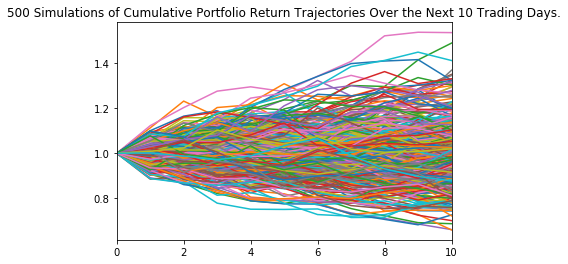

In [187]:
a_wk_line_plot = AAPL_2wks.plot_simulation()

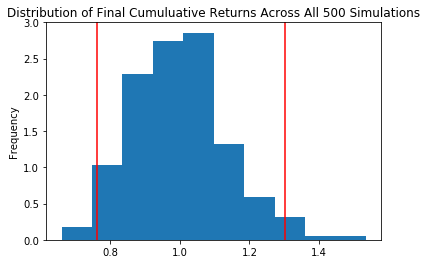

In [188]:
a_wk_dist_plot = AAPL_2wks.plot_distribution()

In [31]:
AAPL_tbl_2wks = AAPL_2wks.summarize_cumulative_return()
print(AAPL_tbl_2wks)

count           500.000000
mean              0.999414
std               0.133652
min               0.660221
25%               0.906464
50%               0.991052
75%               1.076547
max               1.534958
95% CI Lower      0.760906
95% CI Upper      1.301325
Name: 10, dtype: float64


In [175]:
AAPL_tbl_2wks = AAPL_2wks.summarize_cumulative_return()
print(AAPL_tbl_2wks)
wk_lower = AAPL_tbl_2wks.loc["95% CI Lower"]
wk_upper = AAPL_tbl_2wks.loc["95% CI Upper"]

count           500.000000
mean              0.999414
std               0.133652
min               0.660221
25%               0.906464
50%               0.991052
75%               1.076547
max               1.534958
95% CI Lower      0.760906
95% CI Upper      1.301325
Name: 10, dtype: float64


In [176]:
wk_close = df_portfolio_AAPL["AAPL"]["close"].iloc[-1]
lower_wk = wk_lower * wk_close
upper_wk = wk_upper * wk_close
print(lower_wk)
print(upper_wk)

82.86264499070782
141.7143330330184


# Monte Carlo Simulation for Apple- 1 Month

In [32]:
AAPL_1mo = MCSimulation(
    portfolio_data = df_portfolio_AAPL,
    num_simulation = 500,
    num_trading_days = 20
)

AAPL_1mo.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876   
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747   
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956   
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827   
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333   

                                        
                          daily_return  
time                                    
2018-11-02 00:00:00-04:00          NaN  
2018-11-05 00:00:00-05:00    -0.022072  
2018-11-06 00:00:00-05:00     0.010864  
2018-11-07 00:00:00-05:00     0.030081  
2018-11-08 00:00:00-05:00    -0.006765

In [33]:
AAPL_1mo.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   1.062913  1.093131  0.924305  0.991620  1.007538  1.008392  0.951531   
2   1.050813  1.055058  0.918981  0.965590  1.032608  0.989847  0.918110   
3   1.093438  1.095554  0.867309  1.072881  1.013523  0.968456  1.017756   
4   1.051334  1.126621  0.893216  1.068548  1.037664  0.987202  1.026789   
5   1.022838  1.077891  0.879403  1.053245  1.037450  0.942693  1.068413   
6   1.008305  1.074450  0.878579  1.087316  1.029731  0.911878  1.006249   
7   1.087958  1.067831  0.882116  1.010227  0.962848  0.887806  1.059339   
8   1.122523  1.126970  0.815757  0.966740  1.003316  0.860175  1.053823   
9   1.134945  1.059344  0.822163  0.971946  1.019947  0.886939  1.041700   
10  1.129873  0.993919  0.830080  0.965426  1.060057  0.877981  1.015660   
11  1.161531  1.082045  0.782103  0.995887  1.120212  0.900338  1.001777   
12  1.210915  1.094750  0.784126  1.012643  1.088387  0.902918  0.936191   
13  1.249174  1.025917  0.840867  1.023668  1.121245  0.876372  1.004386   
14  1.253886  1.038452  0.860976  1.026071  1.099883  0.874815  0.950647   
15  1.212240  1.055947  0.889365  1.026729  1.113567  0.836847  0.894017   
16  1.253366  1.044873  0.833624  1.029130  1.119453  0.856832  0.955534   
17  1.160749  1.025824  0.821007  0.975540  1.086843  0.858123  0.990034   
18  1.211433  1.002359  0.811741  0.946988  1.080751  0.856167  1.035857   
19  1.287250  0.944707  0.842167  0.892146  1.083481  0.931556  1.085737   
20  1.219951  0.846613  0.829013  0.906967  1.064547  0.901763  1.123893   

         7         8         9    ...       490       491       492       493  \
0   1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000  1.000000   
1   1.027384  0.950947  1.069284  ...  0.967423  0.980180  1.000983  1.063020   
2   0.996441  0.907472  1.061396  ...  0.970868  0.981086  1.025725  1.033959   
3   0.993575  0.922697  1.074109  ...  0.979691  1.010417  1.087734  1.070591   
4   1.019873  0.895627  1.100571  ...  0.948880  1.015009  1.079303  1.091208   
5   1.014168  0.900119  1.096749  ...  0.933085  0.991391  1.050699  1.100333   
6   1.079410  0.939351  1.097335  ...  0.908367  1.004722  1.099559  1.149379   
7   1.042633  0.984303  1.142304  ...  0.922346  1.069529  1.055892  1.096147   
8   1.088576  0.985149  1.153431  ...  0.859598  1.144896  1.092015  1.068389   
9   1.089459  0.973317  1.177197  ...  0.891097  1.237356  1.036467  1.082130   
10  0.989104  0.994707  1.159074  ...  0.858240  1.296792  1.062416  1.123326   
11  1.041149  1.070606  1.175333  ...  0.866172  1.355830  1.040890  1.190881   
12  0.981487  1.103440  1.193279  ...  0.855603  1.374972  1.081667  1.145399   
13  0.970009  1.190926  1.180134  ...  0.882377  1.390682  1.039635  1.197814   
14  0.925472  1.160851  1.181261  ...  0.876477  1.398060  1.025592  1.172581   
15  0.915807  1.132987  1.218174  ...  0.850255  1.462350  1.079340  1.130234   
16  0.881302  1.192634  1.166345  ...  0.833892  1.454058  1.116526  1.163310   
17  0.823210  1.122644  1.090858  ...  0.864691  1.497076  1.126684  1.223799   
18  0.846431  1.111286  1.138460  ...  0.869123  1.509687  1.211454  1.158205   
19  0.900756  1.143411  1.085763  ...  0.757555  1.450917  1.156869  1.164948   
20  0.852292  1.181455  1.054247  ...  0.719220  1.413703  1.110188  1.192380   

         494       495       496       497       498       499  
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1   0.977475  1.006600  0.945266  0.964227  1.059228  1.021529  
2   0.946248  0.972021  0.974934  1.030370  1.034939  1.019883  
3   0.997384  0.992456  1.005735  1.057595  0.970929  1.014544  
4   0.974979  0.947335  1.057890  1.038799  0.946404  1.018918  
5   1.065028  0.901204  1.087678  1.067241  0.927794  1.072308  
6   1.119333  0.848404  1.062745  1.077457  0.935573  1.160247  
7   1.118601  0.822958  1.029476 

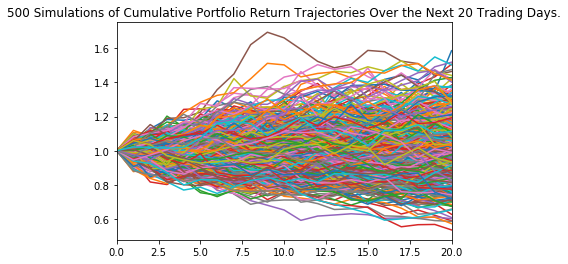

In [189]:
a_mo_line_plot = AAPL_1mo.plot_simulation()

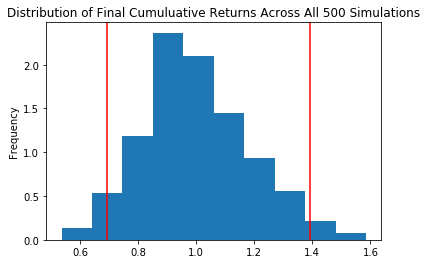

In [190]:
a_mo_dist_plot = AAPL_1mo.plot_distribution()

In [37]:
AAPL_tbl_1mo = AAPL_1mo.summarize_cumulative_return()
print(AAPL_tbl_1mo)

count           500.000000
mean              1.000915
std               0.181597
min               0.536283
25%               0.875456
50%               0.981522
75%               1.113257
max               1.584698
95% CI Lower      0.692105
95% CI Upper      1.393342
Name: 20, dtype: float64


In [168]:
AAPL_tbl_1mo = AAPL_1mo.summarize_cumulative_return()
print(AAPL_tbl_1mo)
mo_lower = AAPL_tbl_1mo.loc["95% CI Lower"]
mo_upper = AAPL_tbl_1mo.loc["95% CI Upper"]

count           500.000000
mean              1.000915
std               0.181597
min               0.536283
25%               0.875456
50%               0.981522
75%               1.113257
max               1.584698
95% CI Lower      0.692105
95% CI Upper      1.393342
Name: 20, dtype: float64


In [169]:
mo_close = df_portfolio_AAPL["AAPL"]["close"].iloc[-1]
lower_mo = mo_lower * mo_close
upper_mo = mo_upper * mo_close
print(lower_mo)
print(upper_mo)

75.37020211747371
151.73495998423016


# Monte Carlo Simulation for Apple- 1 Year

In [38]:
AAPL_1yr = MCSimulation(
    portfolio_data = df_portfolio_AAPL,
    num_simulation = 500,
    num_trading_days = 252
)

AAPL_1yr.portfolio_data.head()

AAPL                                    \
                             open    high     low   close    volume   
time                                                                  
2018-11-02 00:00:00-04:00  209.55  213.89  205.43  206.14  82917876   
2018-11-05 00:00:00-05:00  204.30  204.39  198.17  201.59  51670747   
2018-11-06 00:00:00-05:00  201.92  204.72  201.69  203.78  27934956   
2018-11-07 00:00:00-05:00  205.89  210.01  204.13  209.91  26705827   
2018-11-08 00:00:00-05:00  209.94  210.12  206.75  208.49  19216333   

                                        
                          daily_return  
time                                    
2018-11-02 00:00:00-04:00          NaN  
2018-11-05 00:00:00-05:00    -0.022072  
2018-11-06 00:00:00-05:00     0.010864  
2018-11-07 00:00:00-05:00     0.030081  
2018-11-08 00:00:00-05:00    -0.006765

In [39]:
AAPL_1yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.991577  1.053444  0.960303  0.934341  0.936195  1.098305  1.008244   
2    1.019629  1.058039  0.973577  0.990152  0.936393  1.090877  0.956193   
3    1.050954  1.055177  0.963251  0.864829  0.966208  1.047838  0.954334   
4    1.016826  1.029581  0.962363  0.858362  0.967788  0.986077  0.948792   
5    1.032168  1.094895  0.958263  0.872409  0.971775  0.910081  0.896651   
6    0.983843  1.018637  0.941519  0.884728  1.020079  0.916666  0.877170   
7    0.979695  1.036070  0.909087  0.891010  1.077050  0.905241  0.899600   
8    1.009638  1.070455  0.905791  0.892207  1.066062  0.904589  0.884770   
9    0.995472  1.092877  0.918287  0.888851  0.962479  0.917994  0.823804   
10   0.959229  1.098364  0.901411  0.900901  0.946914  0.994100  0.841131   
11   0.964466  1.119303  0.946861  0.899422  0.949894  0.932964  0.844747   
12   1.004657  1.150417  0.972973  0.944404  0.984733  0.961556  0.838164   
13   0.953876  1.219602  1.026668  0.952596  0.991515  0.966237  0.777546   
14   0.997776  1.235769  1.105564  0.911619  0.999312  0.989159  0.759644   
15   1.022592  1.259468  1.172938  0.915575  0.935505  1.003319  0.740045   
16   1.009194  1.319900  1.144198  0.907892  0.965647  1.095534  0.708837   
17   1.000554  1.345382  1.175142  0.909161  0.949443  1.052341  0.739129   
18   1.060710  1.439526  1.155372  0.876338  0.926190  0.991865  0.732926   
19   1.067263  1.484223  1.087947  0.883287  0.958128  1.020937  0.715747   
20   1.129572  1.540226  1.029569  0.799797  1.021961  1.076356  0.724918   
21   1.115827  1.595556  1.043163  0.831881  1.042604  1.039592  0.726759   
22   1.216704  1.612126  1.081425  0.874943  1.100274  1.046366  0.704962   
23   1.235728  1.594624  1.063577  0.898528  1.057915  1.101862  0.736427   
24   1.251760  1.593406  1.017014  0.981747  1.064011  1.109146  0.770089   
25   1.231826  1.614923  0.981378  0.927486  1.075644  1.140792  0.720113   
26   1.114563  1.682910  0.944505  0.922963  1.095033  1.151368  0.734182   
27   1.154232  1.632322  0.949287  0.858529  1.086871  1.143847  0.734015   
28   1.227074  1.722510  0.930892  0.896700  1.026066  1.150901  0.721799   
29   1.252238  1.786143  0.942826  0.834470  1.025458  1.154285  0.744721   
..        ...       ...       ...       ...       ...       ...       ...   
223  0.702386  1.113186  0.564069  0.727689  1.624190  1.804978  0.931633   
224  0.682272  1.053834  0.526798  0.730973  1.518260  1.761622  0.910293   
225  0.674923  1.095979  0.520525  0.712312  1.480944  1.779827  0.963692   
226  0.662600  1.115475  0.512124  0.691648  1.555772  1.768684  0.917993   
227  0.737180  1.167227  0.485794  0.676811  1.446609  1.825638  0.989481   
228  0.731226  1.154224  0.442251  0.663356  1.478320  1.851456  0.965785   
229  0.690803  1.170878  0.468801  0.709224  1.542733  1.905667  0.982911   
230  0.720341  1.152654  0.473256  0.730953  1.509318  1.871142  1.057000   
231  0.739414  1.194708  0.469774  0.770638  1.528714  1.826835  0.987856   
232  0.709332  1.155421  0.465636  0.749441  1.556473  1.822787  1.016796   
233  0.674492  1.155324  0.483571  0.783842  1.611262  1.888853  0.980545   
234  0.670116  1.142998  0.487841  0.757716  1.604970  1.868836  0.970354   
235  0.622232  1.162335  0.501719  0.736678  1.641260  1.753899  1.019286   
236  0.655399  1.154635  0.512566  0.671507  1.661537  1.750339  1.025954   
237  0.662149  1.201597  0.500521  0.650091  1.704952  1.714270  1.042038   
238  0.650289  1.127538  0.502379  0.669216  1.705039  1.818938  1.089186   
239  0.648301  1.116627  0.487458  0.660557  1.691142  1.735058  1.124252   
240  0.628205  1.096663  0.508972  0.651433  1.711818  1.679279  1.123133   
241  0.621717  1.146507  0.505451  0.663554  1.702777  1.751393  0.996129   
242  0.612724  1.180319  0.515676  0.660052  1.625054  1.762865  0.986302   
243  0

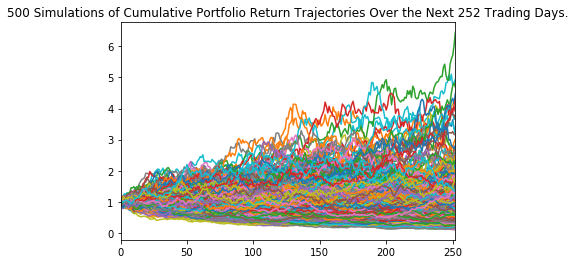

In [267]:
a_yr_line_plot = AAPL_1yr.plot_simulation()

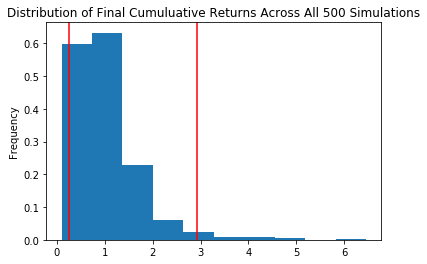

In [192]:
a_yr_dist_plot = AAPL_1yr.plot_distribution()

In [163]:
AAPL_tbl_1yr = AAPL_1yr.summarize_cumulative_return()
print(AAPL_tbl_1yr)
yr_lower = AAPL_tbl_1yr.loc["95% CI Lower"]
yr_upper = AAPL_tbl_1yr.loc["95% CI Upper"]
close = print(df_portfolio_AAPL.iloc[0])


count           500.000000
mean              1.039395
std               0.728940
min               0.095992
25%               0.573189
50%               0.894701
75%               1.294593
max               6.455543
95% CI Lower      0.245382
95% CI Upper      2.922956
Name: 252, dtype: float64
AAPL  open           209.55
      high           213.89
      low            205.43
      close          206.14
      volume    82917876.00
Name: 2018-11-02 00:00:00-04:00, dtype: float64


In [133]:
df_portfolio_AAPL.tail()

AAPL                                     
                             open    high       low   close     volume
time                                                                  
2020-10-26 00:00:00-04:00  114.01  116.55  112.8800  115.06   94591584
2020-10-27 00:00:00-04:00  115.49  117.28  114.5399  116.53   80663462
2020-10-28 00:00:00-04:00  115.05  115.43  111.1000  111.15  123242639
2020-10-29 00:00:00-04:00  112.37  116.93  112.2000  114.52  111552689
2020-10-30 00:00:00-04:00  111.06  111.99  107.7200  108.90  163824978

In [164]:
yr_close = df_portfolio_AAPL["AAPL"]["close"].iloc[-1]
lower_yr = yr_lower * yr_close
upper_yr = yr_upper * yr_close
print(lower_yr)
print(upper_yr)

26.72213469275728
318.3099580196643


In [274]:
txt_yr = f"The Monte Carlo Simulation, based off a 95% confidence interval, for Apple stock price today (${yr_close}) projects the stock price range to be between ${lower_yr:.2f} and ${upper_yr:.2f} in a year."
print (txt_yr)

The Monte Carlo Simulation, based off a 95% confidence interval, for Apple stock price today ($108.9) projects the stock price range to be between $26.72 and $318.31 in a year.


In [277]:
txt_mo = f"The Monte Carlo Simulation, based off a 95% confidence interval, for Apple stock price today (${yr_close}) projects the stock price range to be between ${lower_mo:.2f} and ${upper_mo:.2f} in a month."
print (txt_mo)

The Monte Carlo Simulation, based off a 95% confidence interval, for Apple stock price today ($108.9) projects the stock price range to be between $75.37 and $151.73 in a month.


In [278]:
txt_wk = f"The Monte Carlo Simulation, based off a 95% confidence interval, for Apple stock price today (${yr_close}) projects the stock price range to be between ${lower_wk:.2f} and ${upper_wk:.2f} in two weeks."
print (txt_wk)

The Monte Carlo Simulation, based off a 95% confidence interval, for Apple stock price today ($108.9) projects the stock price range to be between $82.86 and $141.71 in two weeks.


In [275]:
AAPL_yr= pn.Column("# Year Trajectory", a_yr_line_plot.figure, txt_yr)

Column
    [0] Markdown(str)
    [1] Matplotlib(Figure)
    [2] Markdown(str)
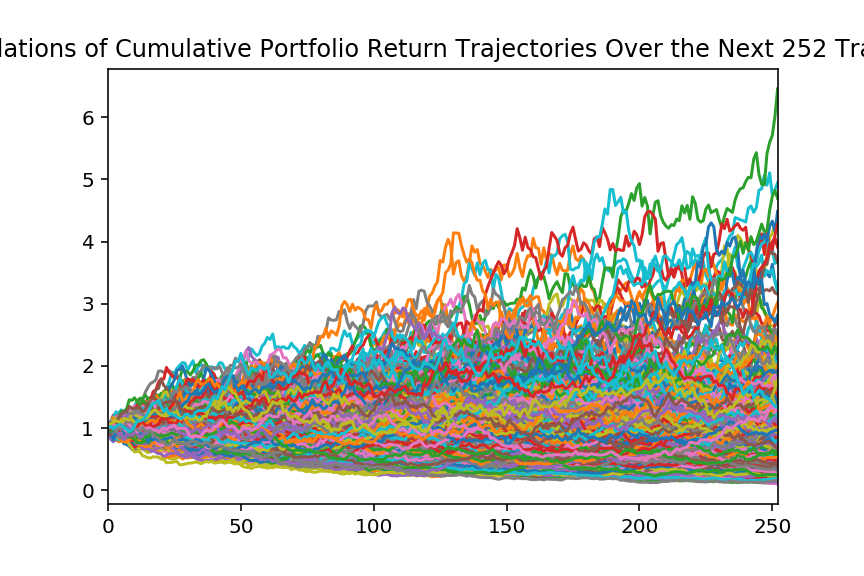

In [276]:
AAPL_yr

In [279]:
AAPL_mo= pn.Column("# Month Trajectory", a_mo_line_plot.figure, txt_mo)

Column
    [0] Markdown(str)
    [1] Matplotlib(Figure)
    [2] Markdown(str)
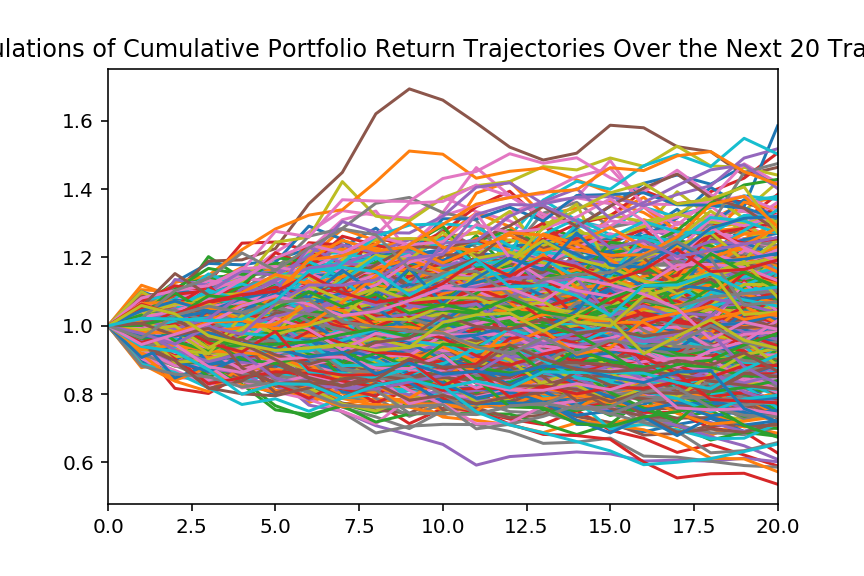

In [280]:
AAPL_mo

In [281]:
AAPL_wk= pn.Column("# Two Week Trajectory", a_wk_line_plot.figure, txt_wk)

Column
    [0] Markdown(str)
    [1] Matplotlib(Figure)
    [2] Markdown(str)
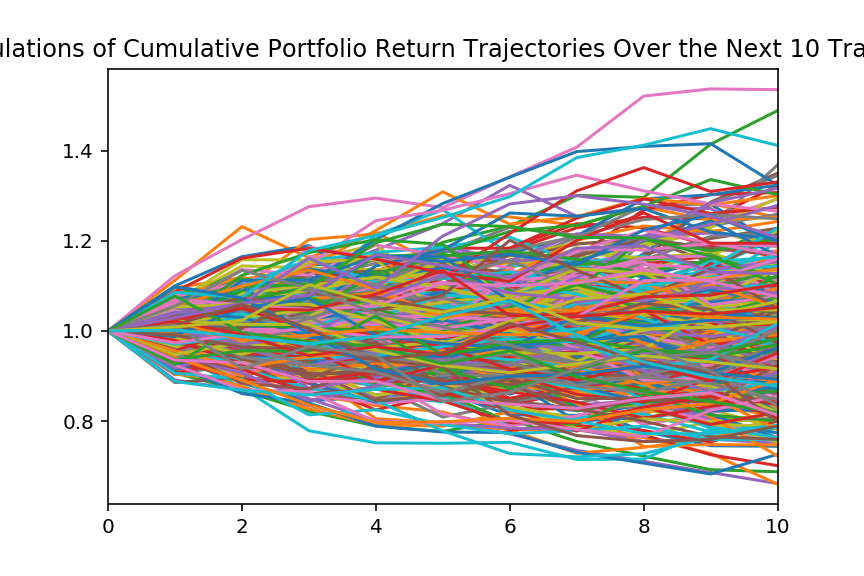

In [282]:
AAPL_wk

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Markdown(str)
    [2] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Markdown(str)
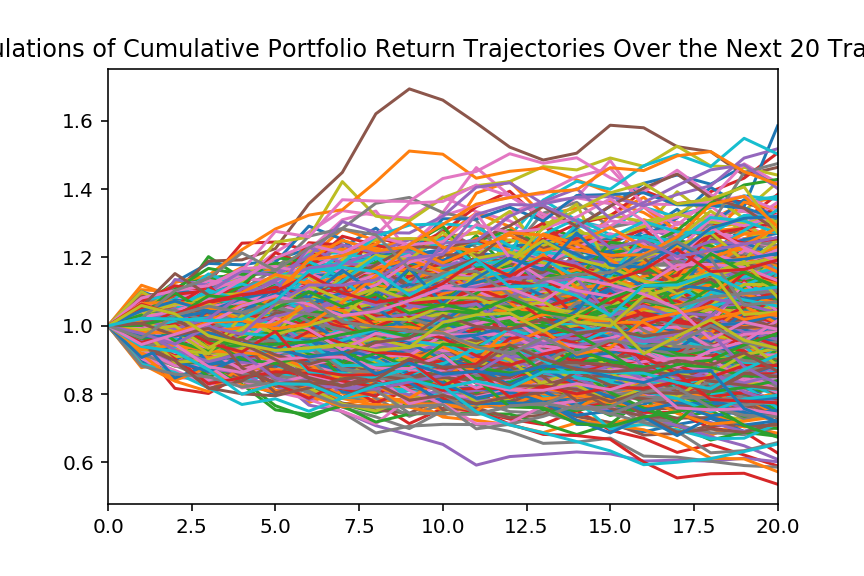
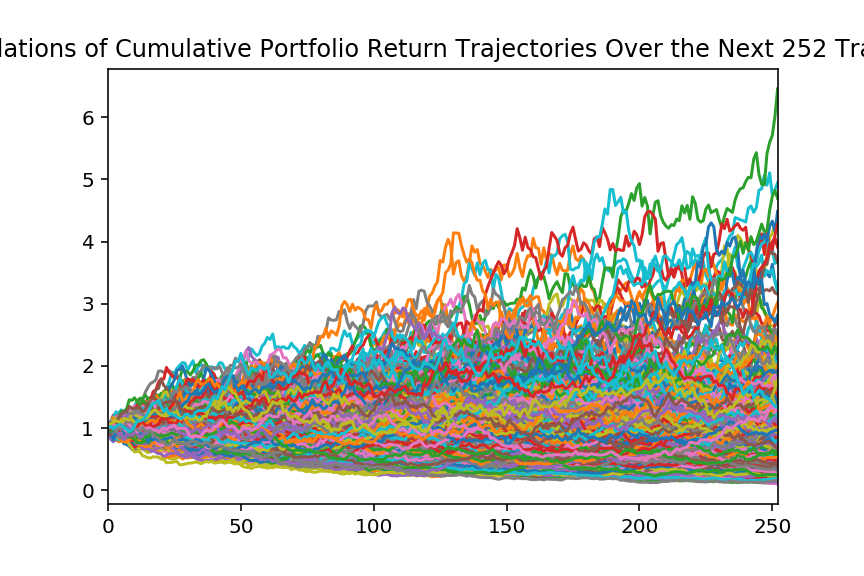
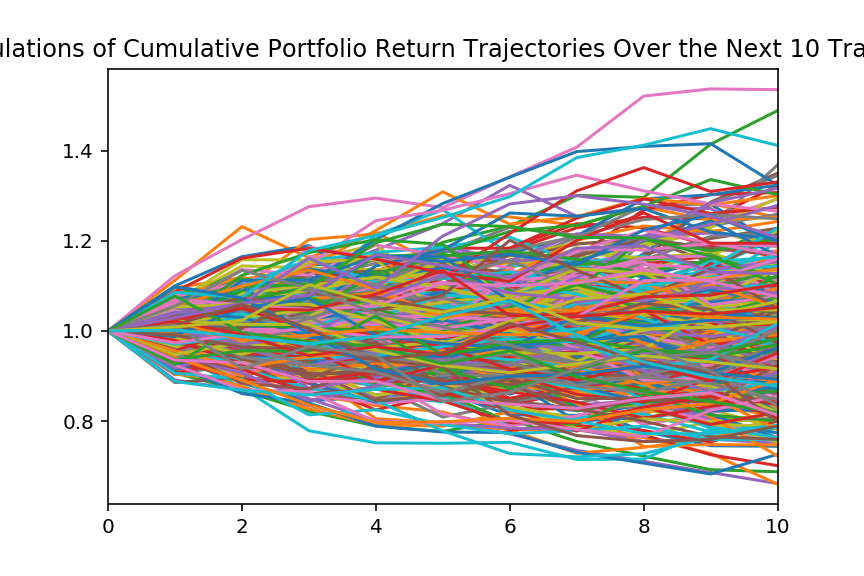

In [283]:
tabs = pn.Tabs(
    ("MC 2 Weeks", AAPL_wk),
    ("MC Month", AAPL_mo),
    ("MC Year", AAPL_yr)
)
tabs